# Metody Obliczeniowe w Nauce i Technice
# Laboratorium 4: Symulowane wyżarzanie
## Przemysław Roman

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def time_exec(func, *args):
    start_time = time.time()
    result = func(*args)
    return result, time.time() - start_time

## Zadanie 1 TSP

Wygeneruj chmurę n losowych punktów w 2D, a następnie zastosuj algorytm symulowa-
nego wyżarzania do przybliżonego rozwiązania problemu komiwojażera dla tych punk-
tów.
1. Przedstaw wizualizację otrzymanego rozwiązania dla 3 różnych wartości n oraz 3
różnych układów punktów w 2D (rozkład jednostajny, rozkład normalny z czterema
różnymi grupami parametrów, dziewięć odseparowanych grup punktów).
2. Zbadaj wpływ sposobu generacji sąsiedniego stanu (consecutive swap vs. arbitrary
swap) oraz funkcji zmiany temperatury na zbieżność procesu optymalizacji.
3. Przedstaw wizualizację (saoptimset) działania procedury minimalizującej funkcję
celu.

### 1.
Przyjmuję poniższą funkcję temperatury jako domyślną

In [2]:
from SimulatedAnnealingTSP import PointsGeneratorTSP, SimulatedAnnealingTSP

SEED = 5040

def get_next_T_func(init_T, T, i, n_iterations):
    return T * 0.995

a) Rozkład jednostajny, mała liczba wierzchołków

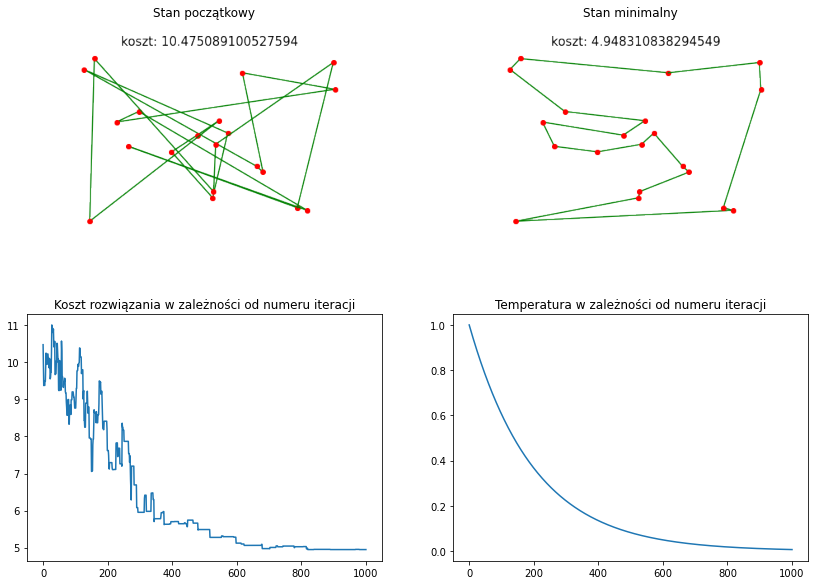

In [3]:
PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_uniform(n=20)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**3, init_T=1,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_uniform_small',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

Rozkład jednostajny, średnia liczba wierzchołków

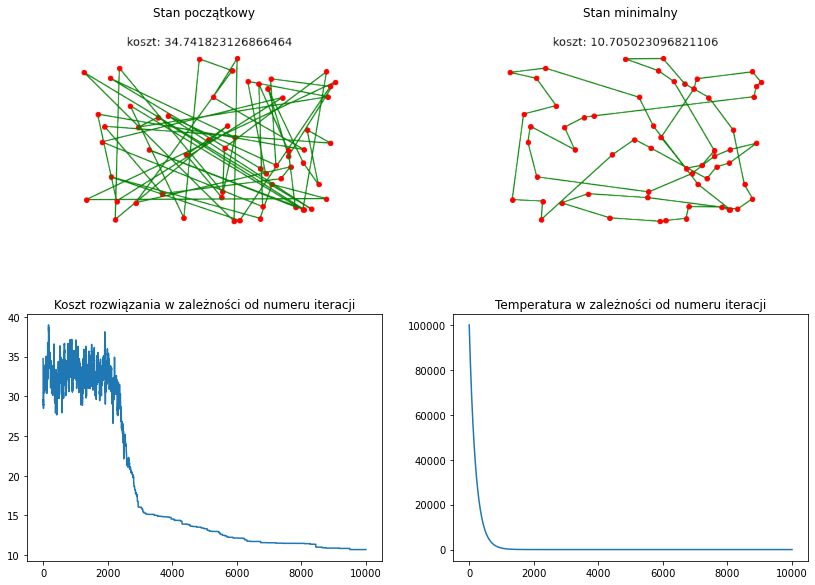

In [4]:
PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_uniform(n=60)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_uniform_medium',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

Rozkład jednostajny, duża liczba wierzchołków

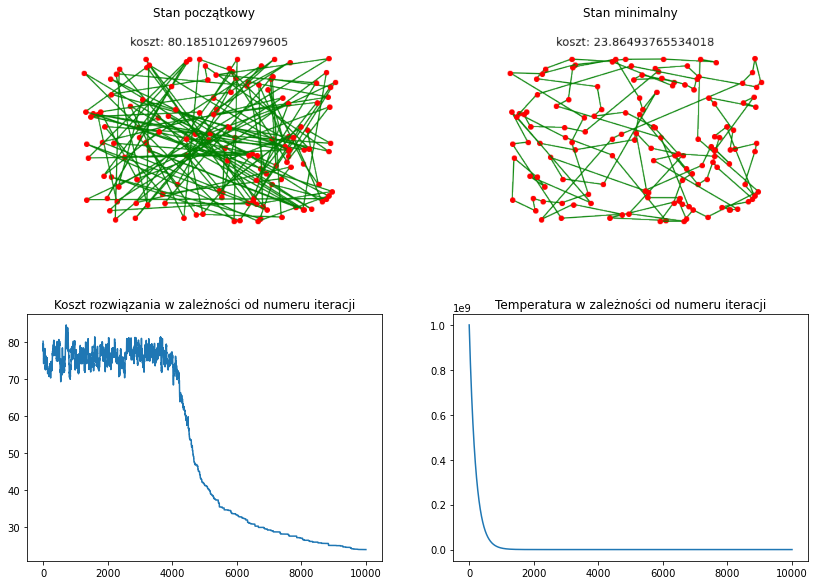

In [5]:
PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_uniform(n=140)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**9,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_uniform_big',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

Rozkład normalny $ \mu = 0, \sigma = 1 $, domyślne parametry

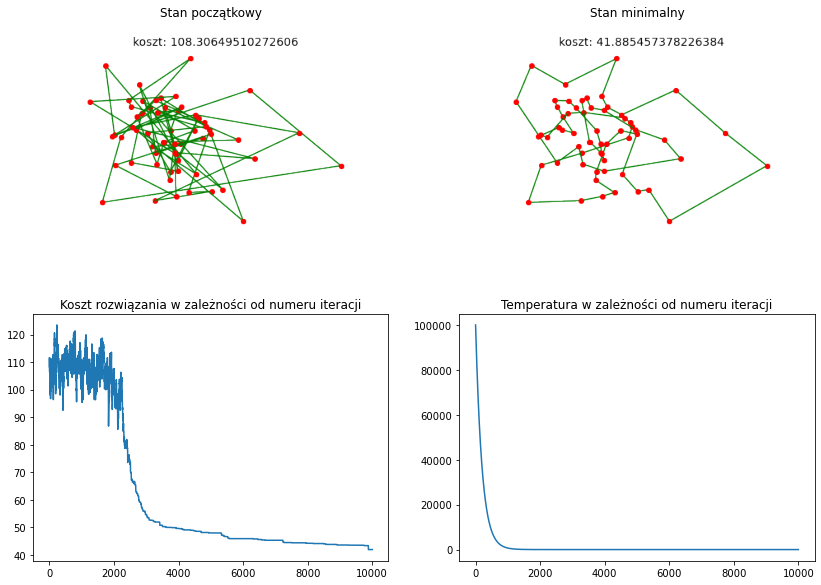

In [6]:
PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_normal(n=60, mu=0, sigma=1) # domyślny

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_normal_mu0_sigma1',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

Rozkład normalny $ \mu = 0, \sigma = 1 $, leptokurtyczny

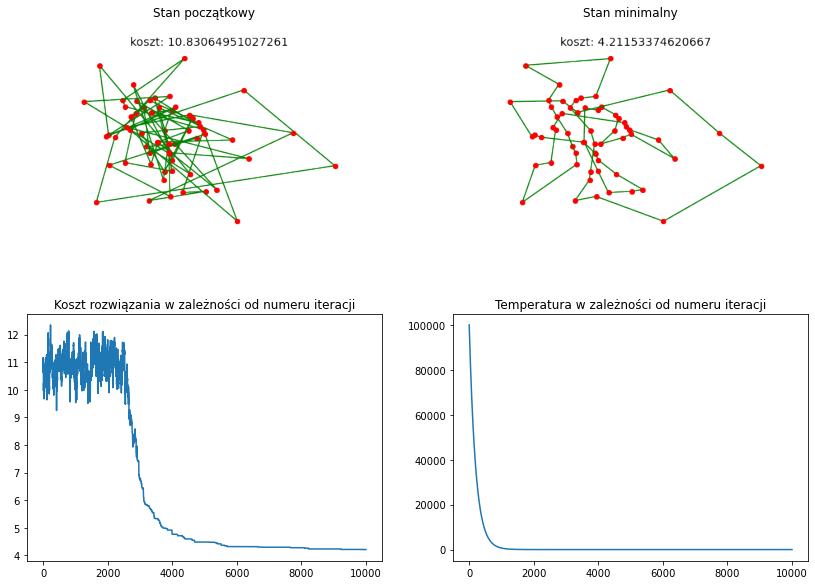

In [7]:
PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_normal(n=60, mu=0, sigma=0.1) # ostry

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_normal_mu0_sigma01',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

Rozkład normalny $ \mu = 0, \sigma = 3 $, platykurtyczny

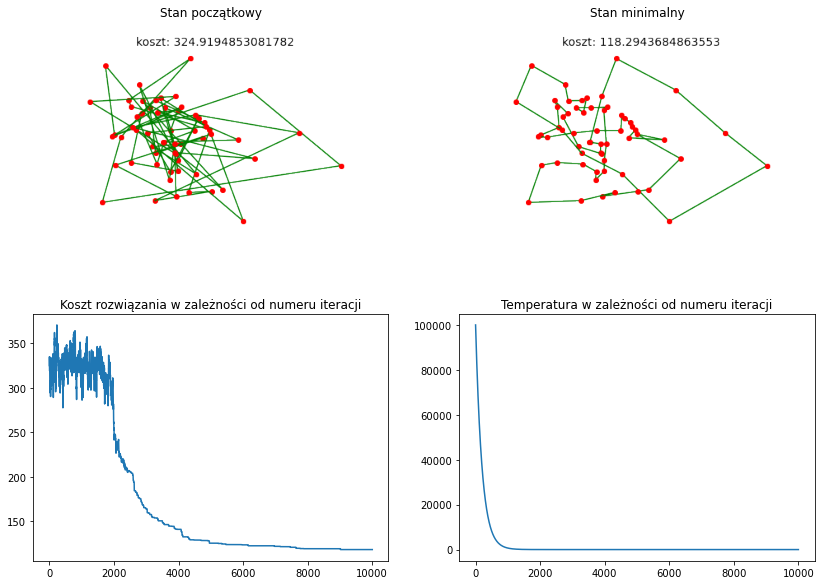

In [8]:
PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_normal(n=60, mu=0, sigma=3) # łagodny

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_normal_mu0_sigma3',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

Rozkład normalny $ \mu = 10, \sigma = 0 $, przesunięty

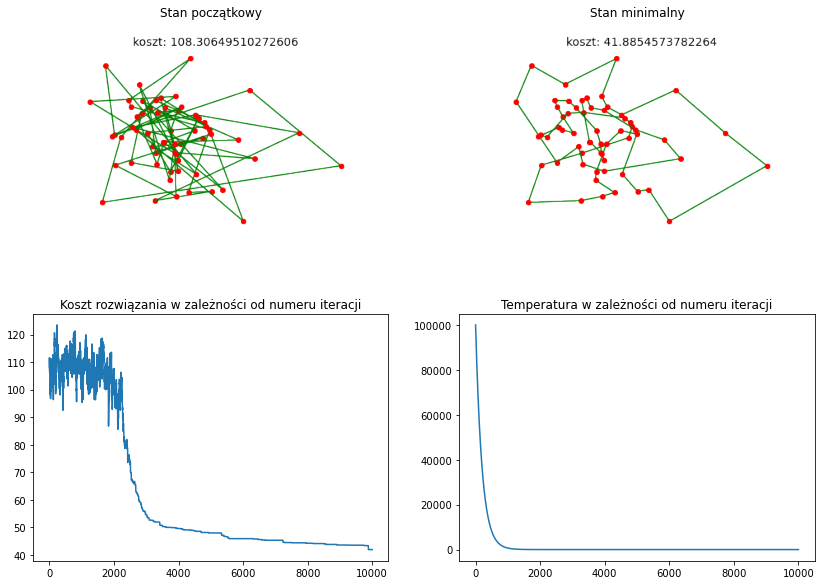

In [9]:
PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_normal(n=60, mu=10, sigma=1)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_normal_mu-10_sigma1',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

Rozkład jednostajny, 9 odseparowanych grup punktów

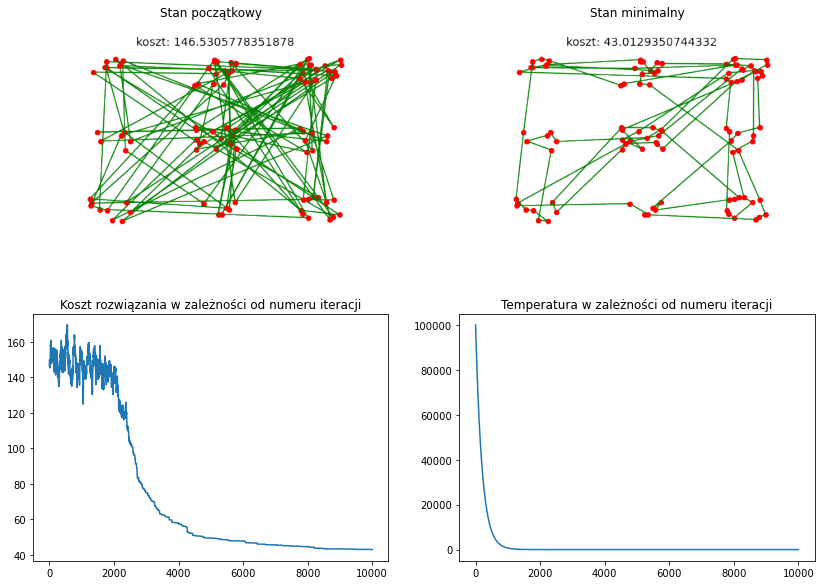

In [10]:
PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_groups(n=100, x_n_groups=3, y_n_groups=3, density=0.2)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_groups9',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

### 2.


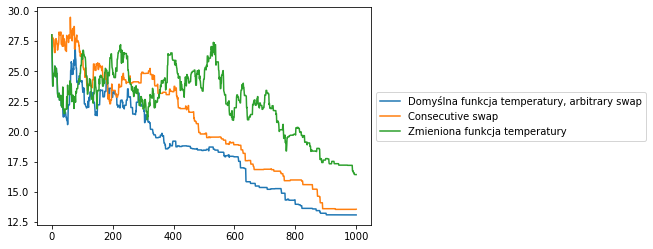

In [13]:
from SimulatedAnnealingTSP import PointsGeneratorTSP, SimulatedAnnealingTSP

SEED = 5040

def get_next_T_func(init_T, T, i, n_iterations):
    return T * 0.995

PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_uniform(n=50)
n_iterations = 10**3
init_T = 1

TSP = SimulatedAnnealingTSP(init_features, n_iterations=n_iterations, init_T=init_T,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_default',
                            seed=SEED, consecutive_swap=False)
TSP.perform(init_min_imgs=False, gif=False)
plt.plot(list(range(n_iterations+1)), TSP.costs, label='Domyślna funkcja temperatury, arbitrary swap')

TSP = SimulatedAnnealingTSP(init_features, n_iterations=n_iterations, init_T=init_T,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_consecutive',
                            seed=SEED, consecutive_swap=True)
TSP.perform(init_min_imgs=False, gif=False)
plt.plot(list(range(n_iterations+1)), TSP.costs, label='Consecutive swap')

def custom_get_next_T_func(init_T, T, i, n_iterations):
    return init_T * (1 - i/n_iterations)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=n_iterations, init_T=init_T,
                            get_next_T_func=custom_get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_custom_temperature_func',
                            seed=SEED, consecutive_swap=False)
TSP.perform(init_min_imgs=False, gif=False)
plt.plot(list(range(n_iterations+1)), TSP.costs, label='Zmieniona funkcja temperatury')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Dla dobranych parametrów widać, że zmieniona funkcja temperatury nie jest trafiona, zbiega wolniej niż pozostałe warianty.
Conscutive swap osiąga gorsze wyniki niż arbitrary swap co nie zgadza się z [informacjami](https://en.wikipedia.org/wiki/Simulated_annealing#Selecting_the_parameters) (podsekcja Efficient candidate generation), znalezionymi przeze mnie w internecie,
według których consecutive swap powinien dawać lepsze wyniki.

## Zadanie 2 Obraz binarny

Wygeneruj losowy obraz binarny o rozmiarze n × n i wybranej gęstości δ czarnych punk-
tów δ = 0.1, 0.3, 0.4. Korzystając z różnego typu sąsiedztwa (4-sąsiadów, 8-sąsiadów,
8-16-sąsiadów) zaproponuj funkcję energii (np. w bliskiej odległości te same kolory przy-
ciągają się, a w dalszej odpychają się) i dokonaj jej minimalizacji za pomocą algorytmu
symulowanego wyżarzania. W jaki sposób można generować stany sąsiednie? Jak róż-
nią się uzyskane wyniki w zależności od rodzaju sąsiedztwa, wybranej funkcji energii i
szybkości spadku temperatury?

In [1]:
from SimulatedAnnealingBinaryImage import SimulatedAnnealingBinaryImage, BinaryImage

SEED = 5040

def get_next_T_func(init_T, T, i, n_iterations):
    return T * 0.999

### 1. Sąsiedztwo 4

In [2]:
def get_cost_func_neighborhood_4(features, i, j, img_width, img_height):
    neighbors_cnt = 0

    if BinaryImage.valid_coords(i-1, j, img_width, img_height): neighbors_cnt += features[i-1][j]
    if BinaryImage.valid_coords(i, j-1, img_width, img_height): neighbors_cnt += features[i][j-1]
    if BinaryImage.valid_coords(i+1, j, img_width, img_height): neighbors_cnt += features[i+1][j]
    if BinaryImage.valid_coords(i, j+1, img_width, img_height): neighbors_cnt += features[i][j+1]

    return neighbors_cnt**2

neighborhood_4 = [(0, 1), (1, 0), (0, -1), (-1, 0)]

a) δ = 0.1

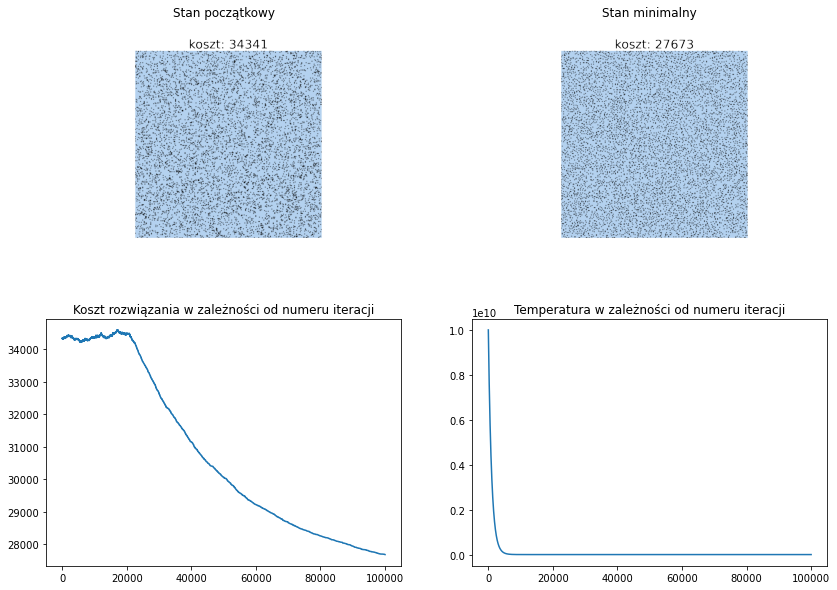

In [3]:
init_features = BinaryImage.generate(256, 256, density=0.1)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**10,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_neighborhood_4,
                                        neighborhood=neighborhood_4,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_4_neighbors')
bin_img.perform(init_min_imgs=True, gif=False)
bin_img.show_all()

In [ ]:
def get_cost_func_8_neighbors(features, i, j, img_width, img_height):
    neighbors_cnt = 0

    if BinaryImage.valid_coords(i-1, j, img_width, img_height): neighbors_cnt += features[i-1][j]
    if BinaryImage.valid_coords(i, j-1, img_width, img_height): neighbors_cnt += features[i][j-1]
    if BinaryImage.valid_coords(i+1, j, img_width, img_height): neighbors_cnt += features[i+1][j]
    if BinaryImage.valid_coords(i, j+1, img_width, img_height): neighbors_cnt += features[i][j+1]
    if BinaryImage.valid_coords(i-1, j-1, img_width, img_height): neighbors_cnt += features[i-1][j-1]
    if BinaryImage.valid_coords(i+1, j-1, img_width, img_height): neighbors_cnt += features[i+1][j-1]
    if BinaryImage.valid_coords(i+1, j+1, img_width, img_height): neighbors_cnt += features[i+1][j+1]
    if BinaryImage.valid_coords(i-1, j+1, img_width, img_height): neighbors_cnt += features[i-1][j+1]

    return neighbors_cnt ** 2


init_features = BinaryImage.generate(25, 25, density=0.5)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**3,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_8_neighbors,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_8_neighbors')
bin_img.perform(init_min_imgs=True, gif=False)
bin_img.show_all()